# SoC'22
## Stock Market Trend Prediction Using Deep Learning
### Shantanu Welling (210010076)

#### Implementation of CNN-LSTM paper

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,LSTM
from keras.layers import Dense
import keras

In [2]:
time_step=10 #time step of input data
feature=6 #features of input data
split_ratio=0.8 #split ratio of train test split data

In [3]:
data=pd.read_csv('tata.csv')

In [4]:
data=pd.DataFrame(data)

In [5]:
Open=np.array(data['Open'])
high=np.array(data['High'])
low=np.array(data['Low'])
close=np.array(data['Close'])
adjc=np.array(data['Adj Close'])
vol=np.array(data['Volume'])

In [6]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-07-13,464.500000,464.500000,455.549988,459.049988,459.049988,4382063
1,2017-07-14,460.000000,460.000000,450.399994,451.299988,451.299988,3974269
2,2017-07-17,455.000000,458.350006,453.250000,454.149994,454.149994,4922453
3,2017-07-18,452.600006,459.500000,452.600006,456.149994,456.149994,2349268
4,2017-07-19,453.000000,462.899994,453.000000,460.600006,460.600006,3395937
...,...,...,...,...,...,...,...
1231,2022-07-06,414.000000,417.299988,410.649994,416.350006,416.350006,12196920
1232,2022-07-07,419.899994,432.950012,419.299988,430.850006,430.850006,17616800
1233,2022-07-08,436.250000,443.850006,429.299988,441.549988,441.549988,23730027
1234,2022-07-11,438.049988,441.200012,433.450012,437.049988,437.049988,12619654


In [7]:
adjcol=5 #column index of adj cp

#### Now we take input data and standardize it with the mean and standard deviation of the corresponding time step.

In [8]:
X = [] #10 days time period input data with all 6 features
Y = [] #11th day input data with 6 features corresponding to the previous 10 days input data in X
 
for i in range(0 , len(high) - time_step -1 , 1):
    mean1=np.mean(np.array(data.iloc[i:i+time_step,1])) #means and standard deviations of respective
    std1=np.std(np.array(data.iloc[i:i+time_step,1]))   #columns
    
    mean2=np.mean(np.array(data.iloc[i:i+time_step,2]))
    std2=np.std(np.array(data.iloc[i:i+time_step,2]))
    
    mean3=np.mean(np.array(data.iloc[i:i+time_step,3]))
    std3=np.std(np.array(data.iloc[i:i+time_step,3]))
    
    mean4=np.mean(np.array(data.iloc[i:i+time_step,4]))
    std4=np.std(np.array(data.iloc[i:i+time_step,4]))
    
    mean5=np.mean(np.array(data.iloc[i:i+time_step,5]))
    std5=np.std(np.array(data.iloc[i:i+time_step,5]))
    
    mean6=np.mean(np.array(data.iloc[i:i+time_step,6]))
    std6=np.std(np.array(data.iloc[i:i+time_step,6]))
    
    temp = []
    temp1=[]
    temp2 = []
    temp3=[]
    temp4=[]
    temp5=[]
    temp6=[]
    temp7=[]
    for j in range(time_step):
        temp.append((data.iloc[i + j, 1] - mean1) / std1)
        temp1.append((data.iloc[i + j, 2] - mean2) / std2)
        temp2.append((data.iloc[i + j, 3] - mean3) / std3)
        temp4.append((data.iloc[i + j, 4] - mean4) / std4)
        temp5.append((data.iloc[i + j, 5] - mean5) / std5)
        temp6.append((data.iloc[i + j, 6] - mean6) / std6)
    temp3.append((data.iloc[i + time_step, 1] - mean1) / std1)
    temp3.append((data.iloc[i + time_step, 2] - mean2) / std2)
    temp3.append((data.iloc[i + time_step, 3] - mean3) / std3)
    temp3.append((data.iloc[i + time_step, 4] - mean4) / std5)
    temp3.append((data.iloc[i + time_step, 5] - mean5) / std5)
    temp3.append((data.iloc[i + time_step, 6] - mean6) / std6)
    
    temp7.append(temp)
    temp7.append(temp1)
    temp7.append(temp2)
    temp7.append(temp4)
    temp7.append(temp5)
    temp7.append(temp6)
    
    X.append(np.array(temp7).reshape(time_step,feature))
    Y.append(np.array(temp3).reshape(1, feature))

In [9]:
#splitting input data into train and test data in the split_ratio
train_x,test_x,train_y,test_y=train_test_split(X,Y,train_size=split_ratio,shuffle=False)
train_x=np.array(train_x)
test_x=np.array(test_x)
train_y=np.array(train_y)
test_y=np.array(test_y)

In [10]:
num_train=len(train_x) #Number of train cases
num_test=len(test_x) #Number of test cases
print(f"Number of train cases: {num_train}")
print(f"Number of test cases: {num_test}")

Number of train cases: 980
Number of test cases: 245


#### Making the CNN-LSTM Model with parameters mentioned in the given paper. Using mean absolute error as loss function for back propagation.

In [11]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=1, padding='same', activation='tanh',batch_input_shape=(None,time_step,feature)))
model.add(MaxPooling1D(pool_size=1,padding='same'))
model.add(LSTM(64,activation='tanh'))
model.add(Dense(1))
model.compile(optimizer='adam', loss=keras.losses.MeanAbsoluteError())
model.fit(train_x, train_y, validation_data=(test_x,test_y), epochs=100)

Epoch 1/100
31/31 [==============================] - 3s 22ms/step - loss: 1.3862 - val_loss: 1.3686
Epoch 2/100
31/31 [==============================] - 0s 8ms/step - loss: 1.3835 - val_loss: 1.3759
Epoch 3/100
31/31 [==============================] - 0s 9ms/step - loss: 1.3841 - val_loss: 1.3757
Epoch 4/100
31/31 [==============================] - 0s 10ms/step - loss: 1.3836 - val_loss: 1.3772
Epoch 5/100
31/31 [==============================] - 0s 9ms/step - loss: 1.3834 - val_loss: 1.3769
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 1.3835 - val_loss: 1.3703
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 1.3834 - val_loss: 1.3718
Epoch 8/100
31/31 [==============================] - 0s 9ms/step - loss: 1.3832 - val_loss: 1.3675
Epoch 9/100
31/31 [==============================] - 0s 9ms/step - loss: 1.3836 - val_loss: 1.3748
Epoch 10/100
31/31 [==============================] - 0s 8ms/step - loss: 1.3834 - val_loss: 1.3675
Epoch 1

Epoch 83/100
31/31 [==============================] - 0s 7ms/step - loss: 1.3823 - val_loss: 1.3725
Epoch 84/100
31/31 [==============================] - 0s 6ms/step - loss: 1.3823 - val_loss: 1.3741
Epoch 85/100
31/31 [==============================] - 0s 7ms/step - loss: 1.3827 - val_loss: 1.3723
Epoch 86/100
31/31 [==============================] - 0s 5ms/step - loss: 1.3829 - val_loss: 1.3721
Epoch 87/100
31/31 [==============================] - 0s 6ms/step - loss: 1.3830 - val_loss: 1.3740
Epoch 88/100
31/31 [==============================] - 0s 6ms/step - loss: 1.3825 - val_loss: 1.3713
Epoch 89/100
31/31 [==============================] - 0s 6ms/step - loss: 1.3826 - val_loss: 1.3721
Epoch 90/100
31/31 [==============================] - 0s 7ms/step - loss: 1.3828 - val_loss: 1.3730
Epoch 91/100
31/31 [==============================] - 0s 5ms/step - loss: 1.3833 - val_loss: 1.3772
Epoch 92/100
31/31 [==============================] - 0s 7ms/step - loss: 1.3825 - val_loss: 1.3711


In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 32)            224       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 10, 32)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 25,121
Trainable params: 25,121
Non-trainable params: 0
_________________________________________________________________
None


#### Input standardised test data into the model to predict the output.

In [13]:
predicted  = model.predict(test_x) 

8/8 [==============================] - 0s 3ms/step


In [14]:
predicted=np.array(predicted[:,0]).reshape(-1,1) #Array with adjcp of predicted data

#### The output value obtained through the model of CNN-LSTM is the standardized value, and the standardized value is restored to the original value using the corresponding means and standard deviations of that time step.

In [15]:
for j in range(len(train_x) , len(train_x) + len(test_x)):
    m5=np.mean(np.array(data.iloc[j:j+time_step,adjcol]))
    s5=np.std(np.array(data.iloc[j:j+time_step,adjcol]))
    test_y[j - len(train_x)] = test_y[j - len(train_x)] * s5 + m5
    predicted[j - len(train_x)] = predicted[j - len(train_x)] * s5 + m5

In [16]:
day=np.array([i for i in range(num_test)]) #Array with days index for X-axis of plot
testy=test_y[:,:,adjcol] #Array with adjcp of the actual data

#### Plotting the actual data vs predicted data

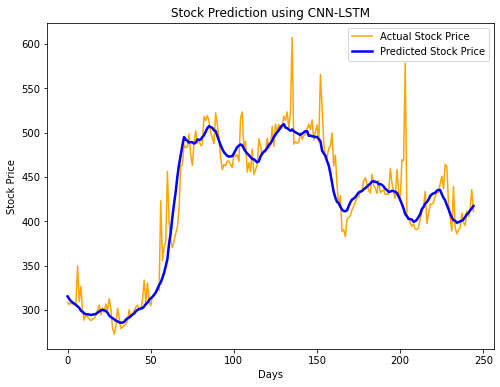

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(day,testy, color = 'orange', lw=1.5)
plt.plot(day,predicted.reshape(num_test), color = 'blue', lw=2.5)
plt.title("Stock Prediction using CNN-LSTM")
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.legend(['Actual Stock Price', 'Predicted Stock Price']);

In [18]:
mae=np.mean(abs(testy-predicted.reshape(num_test))) #Mean Absolute Error of the prediction
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 83.18753111943225


In [19]:
mean_y=np.mean(testy)
print(f"Mean of Actual Data: {mean_y}")

Mean of Actual Data: 420.1339632162563


In [20]:
err=mae*100/mean_y
print(f"{err}% of mean stock price is the mean absolute error")

19.80023954326515% of mean stock price is the mean absolute error


#### Thus, the implementation has concluded with the model prediction accuracy (with respect to mean absolute error) being approximately 81.2%.